# Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings 
import warnings
warnings.filterwarnings("ignore")

C:\Users\VAMSI\AppData\Local\Temp\ipykernel_21752\3814455656.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Loading the dataset

In [2]:
dfX = pd.read_csv('stocknet_trn_data.csv')
dfY = pd.read_csv('stocknet_trn_data_targets.csv', names = ['label', 'close'])
dfT = pd.read_csv('stocknet_tst_data.csv')

In [3]:
dfX.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [4]:
dfY.head()

,label,close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [5]:
dfT.head()

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800


In [6]:
dfX[dfX.isna().any(axis=1)]

,Open,High,Low,Volume
7642,NaN,NaN,NaN,NaN
46002,NaN,NaN,NaN,NaN
61502,NaN,NaN,NaN,NaN


In [7]:
dfY[dfY.isna().any(axis=1)]

,label,close
7642,d7643,NaN
46002,d46003,NaN
61502,d61503,NaN


In [8]:
dfT[dfT.isna().any(axis=1)]

,Open,High,Low,Volume


In [9]:
dfX.dropna(how='any', inplace=True)

In [10]:
dfY.dropna(how='any', inplace=True)

In [11]:
dfX.isna().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [12]:
dfY.isna().sum()

label    0
close    0
dtype: int64

In [13]:
dfX.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [14]:
dfY.head()

,label,close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [15]:
df = pd.concat([dfX, dfY], axis=1, join='inner')

In [16]:
df.head()

,Open,High,Low,Volume,label,close
0,75.430000,75.910004,75.139999,3436700.0,d1,75.650002
1,124.930000,124.940002,124.169998,2366700.0,d2,124.449997
2,84.339996,84.370003,82.370003,11338700.0,d3,82.660004
3,56.770000,57.150002,56.529999,413300.0,d4,57.009998
4,47.419998,48.090000,46.759998,9531100.0,d5,47.860001


In [17]:
df.isna().sum()

Open      0
High      0
Low       0
Volume    0
label     0
close     0
dtype: int64

In [18]:
X = df[['Open', 'High', 'Low', 'Volume']]

In [19]:
X.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [20]:
y = df.iloc[:, 5:6]

In [21]:
y.head()

,close
0,75.650002
1,124.449997
2,82.660004
3,57.009998
4,47.860001


In [22]:
X.shape

(97729, 4)

In [23]:
y.shape

(97729, 1)

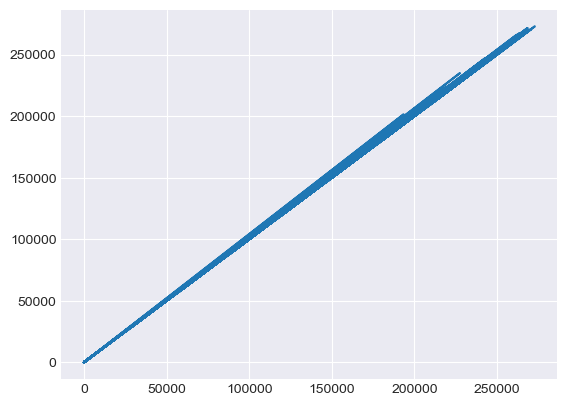

In [26]:
plt.plot('Open', 'High', data=df)

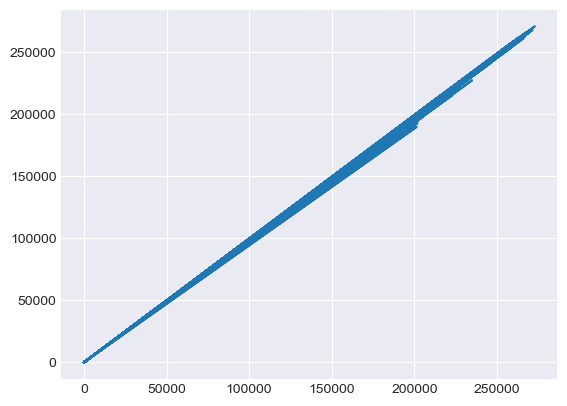

In [27]:
plt.plot('High', 'Low', data=df)

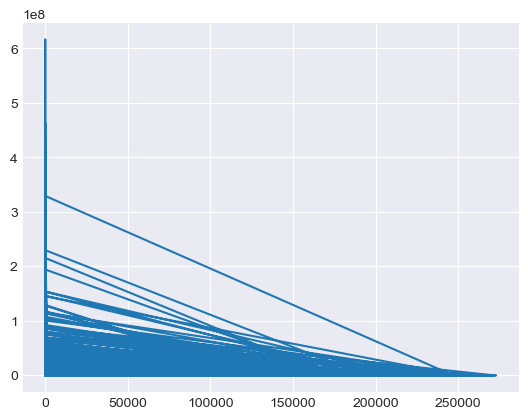

In [28]:
plt.plot('High', 'Volume', data=df)

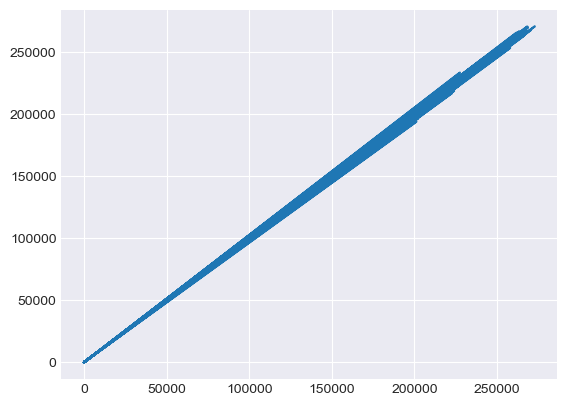

In [29]:
plt.plot('Open', 'close', data=df)


# PHASE_2

# Linear Regression

<Axes: >

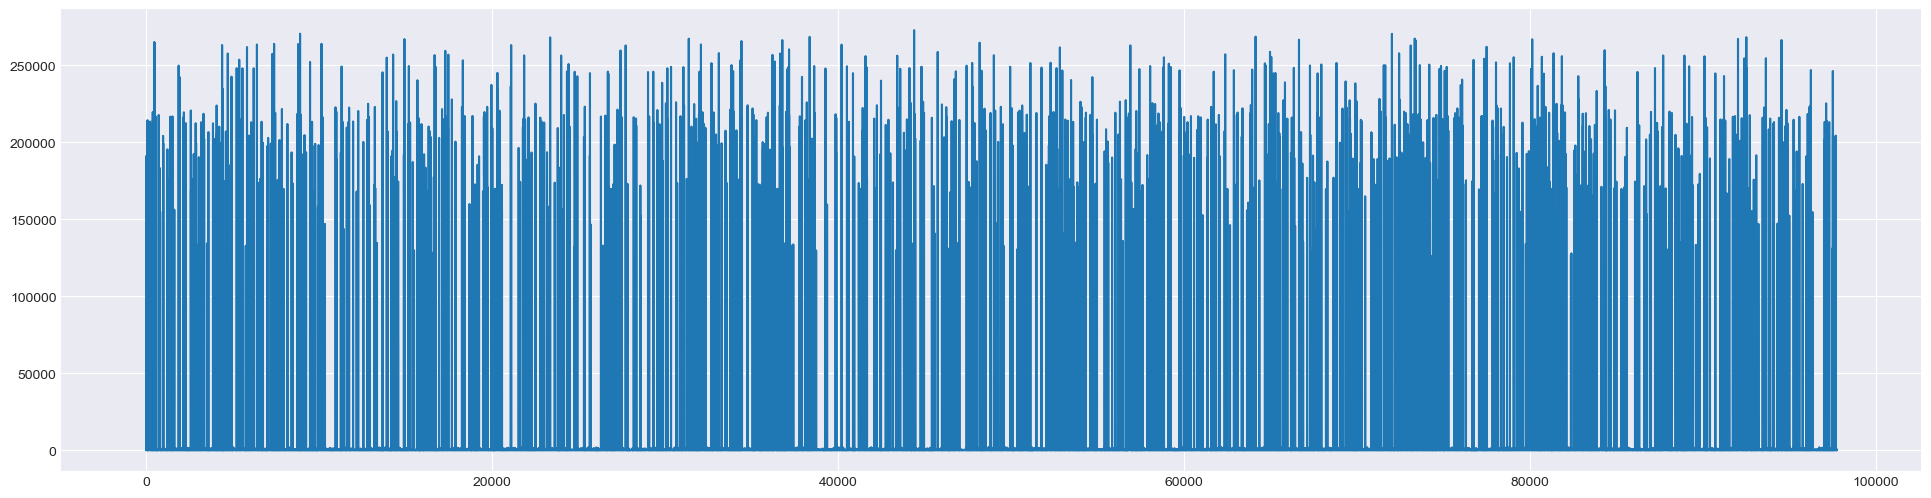

In [30]:
X['Open'].plot(figsize=(24,6))

In [31]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97729 entries, 0 to 97731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


In [33]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97729 entries, 0 to 97731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   97729 non-null  object 
 1   close   97729 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [36]:
X_train.shape

(73296, 4)

In [37]:
X_test.shape

(24433, 4)

In [38]:
y_train.shape

(73296, 1)

In [39]:
y_test.shape

(24433, 1)

In [40]:
# Fitting the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
#Return the coefficient of determination of the prediction.
LR.score(X_test,y_test,sample_weight=None)

0.999990296851084

In [42]:
pred=LR.predict(X_test) #Predict using the linear model.
pred

array([[0.00018173],
       [0.00048656],
       [0.00019337],
       ...,
       [0.00041254],
       [0.0005168 ],
       [0.00027523]])

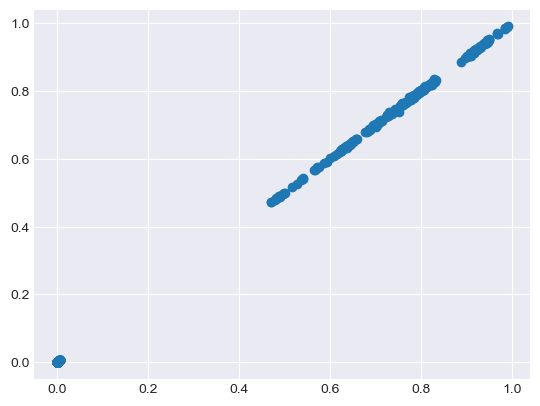

In [43]:
#checking predicted y and labeled y using a scatter plot.
plt.scatter(y_test,pred)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Model Coefficients:', LR.coef_)
print('Model intercept:', LR.intercept_)
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred)))
print('R_squared Value:', r2_score(y_test, pred))

Model Coefficients: [[-5.82620995e-01  8.14007779e-01  7.70493393e-01  8.18818920e-07]]
Model intercept: [2.75492448e-07]
Mean Squared Error: 6.105198492075248e-08
Mean Absolute Error: 2.0368883495576596e-05
Root Mean Squared Error: 0.0002470869986882201
R_squared Value: 0.999990296851084


# Decision Tree Regressor

In [48]:
X

array([[0.0002687 , 0.00026982, 0.00027   , 0.00557344],
       [0.00045015, 0.0004495 , 0.0004509 , 0.00383818],
       [0.00030136, 0.00030083, 0.00029667, 0.01838846],
       ...,
       [0.00212223, 0.00212223, 0.00209974, 0.00554069],
       [0.00043446, 0.00043378, 0.00041692, 0.02150707],
       [0.00022999, 0.0002297 , 0.00023004, 0.0010817 ]])

In [49]:
y

array([[0.00027164],
       [0.00045167],
       [0.0002975 ],
       ...,
       [0.00211437],
       [0.00041828],
       [0.00023131]])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)

In [51]:
X_train.shape

(73296, 4)

In [52]:
y_train.shape

(73296, 1)

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grid=GridSearchCV(DecisionTreeRegressor(max_depth=10,min_samples_split=8),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=10, min_samples_split=8),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [54]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'criterion': 'poisson'}
0.9999759779992788


In [55]:
from sklearn.tree import DecisionTreeRegressor
grid = DecisionTreeRegressor(criterion="poisson",max_depth=10,min_samples_split=8,random_state=0)
grid.fit(X_train,y_train)
pred_dt=grid.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Mean Squared Error:', mean_squared_error(y_test, pred_dt))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dt))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred_dt)))
print('R_squared Value:', r2_score(y_test, pred_dt))

Mean Squared Error: 1.474497034680812e-07
Mean Absolute Error: 5.038266703567706e-05
Root Mean Squared Error: 0.0003839918013032065
R_squared Value: 0.9999765654395639


# Random Forest Regressor

In [70]:
X

array([[0.0002687 , 0.00026982, 0.00027   , 0.00557344],
       [0.00045015, 0.0004495 , 0.0004509 , 0.00383818],
       [0.00030136, 0.00030083, 0.00029667, 0.01838846],
       ...,
       [0.00212223, 0.00212223, 0.00209974, 0.00554069],
       [0.00043446, 0.00043378, 0.00041692, 0.02150707],
       [0.00022999, 0.0002297 , 0.00023004, 0.0010817 ]])

In [71]:
y

array([[0.00027164],
       [0.00045167],
       [0.0002975 ],
       ...,
       [0.00211437],
       [0.00041828],
       [0.00023131]])

In [72]:
X_train.shape

(73296, 4)

In [73]:
y_train.shape

(73296, 1)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid_rf={'criterion':['squared_error','friedman_mse','poisson']}
grid_rf=GridSearchCV(RandomForestRegressor(n_estimators = 90,max_depth=10,min_samples_split=5),param_grid_rf)
grid_rf.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(max_depth=10, min_samples_split=5,
                                             n_estimators=90),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson']})

In [75]:
print(grid_rf.best_params_)
print(grid_rf.score(X_test,y_test))

{'criterion': 'friedman_mse'}
0.9999837156213741


In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(criterion='friedman_mse',n_estimators = 90,max_depth=10,min_samples_split=5)
regressor_rf.fit(X_train, y_train) 
pred_rf = regressor_rf.predict(X_test)


In [77]:
pred_rf

array([0.00017206, 0.00048772, 0.00019208, ..., 0.00041357, 0.00051752,
       0.00027313])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Mean Squared Error:', mean_squared_error(y_test, pred_rf))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rf))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred_rf)))
print('R_squared Value:', r2_score(y_test, pred_rf))


Mean Squared Error: 1.0254544685305473e-07
Mean Absolute Error: 3.001035930635447e-05
Root Mean Squared Error: 0.00032022718006605047
R_squared Value: 0.9999837021885077


# Support Vector Regression

In [79]:
X

array([[0.0002687 , 0.00026982, 0.00027   , 0.00557344],
       [0.00045015, 0.0004495 , 0.0004509 , 0.00383818],
       [0.00030136, 0.00030083, 0.00029667, 0.01838846],
       ...,
       [0.00212223, 0.00212223, 0.00209974, 0.00554069],
       [0.00043446, 0.00043378, 0.00041692, 0.02150707],
       [0.00022999, 0.0002297 , 0.00023004, 0.0010817 ]])

In [80]:
y

array([[0.00027164],
       [0.00045167],
       [0.0002975 ],
       ...,
       [0.00211437],
       [0.00041828],
       [0.00023131]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
#performing the train test slpit

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,50,100],'kernel':['rbf','linear'],'gamma':[0.005,0.01,0.1,1]}
grid_svr=GridSearchCV(SVR(),param_grid)
grid_svr.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.005, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']})

In [83]:
print(grid_svr.best_params_)
print(grid_svr.score(X_test,y_test))

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
-0.5031392303088582


In [121]:
#svr_lin  = SVR(kernel='linear', C=100)
svr_rbf = SVR(kernel='rbf',C = 1, gamma=1)
svr_rbf.fit(X_train, y_train)
pred_svr = svr_rbf.predict(X_test)

In [122]:
pred_svr

array([0.09819858, 0.09935122, 0.10029009, ..., 0.09996107, 0.09994682,
       0.09810467])

In [123]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred_svr)))
print('R_squared Value:', r2_score(y_test, pred_svr))


Mean Squared Error: 0.009457716707986598
Mean Absolute Error: 0.09680778112363161
Root Mean Squared Error: 0.0972507928398869
R_squared Value: -0.5031392303088582


# KNN

In [96]:
X

array([[0.0002687 , 0.00026982, 0.00027   , 0.00557344],
       [0.00045015, 0.0004495 , 0.0004509 , 0.00383818],
       [0.00030136, 0.00030083, 0.00029667, 0.01838846],
       ...,
       [0.00212223, 0.00212223, 0.00209974, 0.00554069],
       [0.00043446, 0.00043378, 0.00041692, 0.02150707],
       [0.00022999, 0.0002297 , 0.00023004, 0.0010817 ]])

In [97]:
y

array([[0.00027164],
       [0.00045167],
       [0.0002975 ],
       ...,
       [0.00211437],
       [0.00041828],
       [0.00023131]])

In [98]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0003578162591069029
RMSE value for k=  2 is: 0.0003187663520188387
RMSE value for k=  3 is: 0.00031178887810200107
RMSE value for k=  4 is: 0.0003140782561986974
RMSE value for k=  5 is: 0.00032295684059385646
RMSE value for k=  6 is: 0.0003290621884326851
RMSE value for k=  7 is: 0.0003294871420755259
RMSE value for k=  8 is: 0.00032921043461028334
RMSE value for k=  9 is: 0.000334721080375755
RMSE value for k=  10 is: 0.00034158367637216776
RMSE value for k=  11 is: 0.00034199903465578524
RMSE value for k=  12 is: 0.00035095256872210264
RMSE value for k=  13 is: 0.0003570931098506361
RMSE value for k=  14 is: 0.0003626808011102135
RMSE value for k=  15 is: 0.0003654468472217838
RMSE value for k=  16 is: 0.0003731646320131937
RMSE value for k=  17 is: 0.0003759722823846929
RMSE value for k=  18 is: 0.0003810663245425691
RMSE value for k=  19 is: 0.0003886384275945632
RMSE value for k=  20 is: 0.000392135344000775


<Axes: >

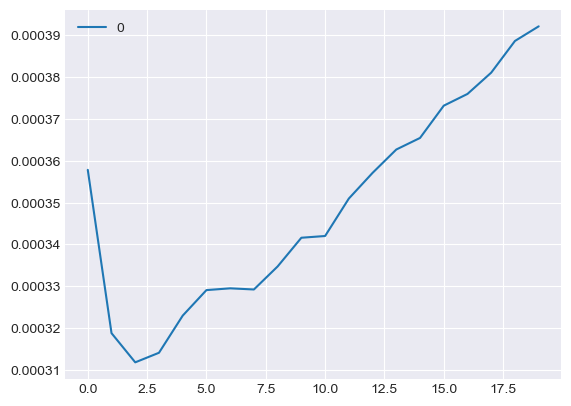

In [99]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [100]:
#varifying the same using gridsearch

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [101]:
print(model.best_params_)
print(model.score(X_test,y_test))

{'n_neighbors': 3}
0.999984549798531


In [102]:
#At k = 3, approx, we can see we have the lowest rmse

In [103]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)  #fit the model
pred_knn=model.predict(X_test) #make prediction on test set

In [104]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred_knn)))
print('R_squared Value:', r2_score(y_test, pred_knn))


Mean Squared Error: 9.721230450810448e-08
Mean Absolute Error: 3.166236517712933e-05
Root Mean Squared Error: 0.00031178887810200107
R_squared Value: 0.999984549798531


# Errors of all models

In [ ]:
#After comparing all the models we found less Error in Linear Regression,so we can use linear regression to predict the stock price.
# The following are the errors of models that we have used
#Errors of linear regression 
Mean Squared Error: 6.105198492075248e-08
Mean Absolute Error: 2.0368883495576596e-05
Root Mean Squared Error: 0.0002470869986882201
R_squared Value: 0.999990296851084
    
#Errors of Decision tree regressor
Mean Squared Error: 1.474497034680812e-07
Mean Absolute Error: 5.038266703567706e-05
Root Mean Squared Error: 0.0003839918013032065
R_squared Value: 0.9999765654395639

#Errors of Random forest regressor
Mean Squared Error: 1.0254544685305473e-07
Mean Absolute Error: 3.001035930635447e-05
Root Mean Squared Error: 0.00032022718006605047
R_squared Value: 0.9999837021885077
    
#Errors of Support vector regressor
Mean Squared Error: 0.009457716707986598
Mean Absolute Error: 0.09680778112363161
Root Mean Squared Error: 0.0972507928398869
R_squared Value: -0.5031392303088582 
    
#Errors of KNeighborsRegressor
Mean Squared Error: 9.721230450810448e-08
Mean Absolute Error: 3.166236517712933e-05
Root Mean Squared Error: 0.00031178887810200107
R_squared Value: 0.999984549798531

In [93]:
#Applying the best model Linear regression

In [141]:
dfT = pd.read_csv('stocknet_tst_data.csv')

In [142]:
dfT

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [143]:
Final_predictions=LR.predict(dfT) #Predict using the linear model.
Final_predictions

array([[52.99453176],
       [96.20086107],
       [59.84644902],
       ...,
       [30.32027287],
       [55.37067764],
       [94.75341095]])

In [138]:
D = dfY[['label']]
d = D.iloc[:10860,:]
d

,label
0,d1
1,d2
2,d3
3,d4
4,d5
...,...
10855,d10856
10856,d10857
10857,d10858
10858,d10859


In [144]:
c = pd.DataFrame(Final_predictions, columns =['close'])
c

,close
0,52.994532
1,96.200861
2,59.846449
3,127.925715
4,29.388766
...,...
10855,51.513356
10856,69.021728
10857,30.320273
10858,55.370678


In [145]:
DF = pd.concat([d,c], axis=1, join='inner')
DF

,label,close
0,d1,52.994532
1,d2,96.200861
2,d3,59.846449
3,d4,127.925715
4,d5,29.388766
...,...,...
10855,d10856,51.513356
10856,d10857,69.021728
10857,d10858,30.320273
10858,d10859,55.370678


In [166]:
DF.to_csv('FINAL_PRED.csv') 